In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# x_train= train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]
x_train, y_train = train_data.iloc[:,:-1],train_data.iloc[:,-1]
x_train= train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

y_train = ['Survived']
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df = pd.DataFrame(x_train.head())
df.loc[df["Sex"] == "male"] = 1
df.loc[df["Sex"] == "female"] = 0
df['Sex'] = df['Sex'].astype('int64')
print(df.dtypes)
df


Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Fare      float64
dtype: object


,Pclass,Sex,Age,SibSp,Fare
0,1,1,1.0,1,1.0
1,0,0,0.0,0,0.0
2,0,0,0.0,0,0.0
3,0,0,0.0,0,0.0
4,1,1,1.0,1,1.0


In [35]:
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

TypeError: ignored

Text(0.5, 1.0, 'Variable Correlation')

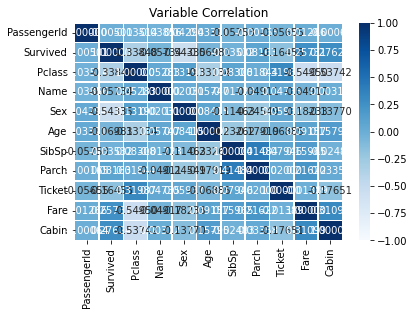

In [14]:
#correlation matrix 
matrix = x_train.copy()
for col in matrix.columns:
    if matrix[col].dtype == "O":
         matrix[col] = matrix[col].factorize(sort=True)[0]
corr_matrix = matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.5f', cmap="Blues", cbar=True, linewidths=0.5)
plt.title("Variable Correlation")